In [1]:
# Setup
library(ggplot2)
library(dplyr)
library(ggcorrplot)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# Reading file data
fireData <- read.csv('forestfires.csv')

In [3]:
# Observations and variables
head(fireData)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [4]:
# List all the variables and data types
str(fireData)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


In [5]:
#Get center variability, center and outliers
summary(fireData)
#No missing values

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


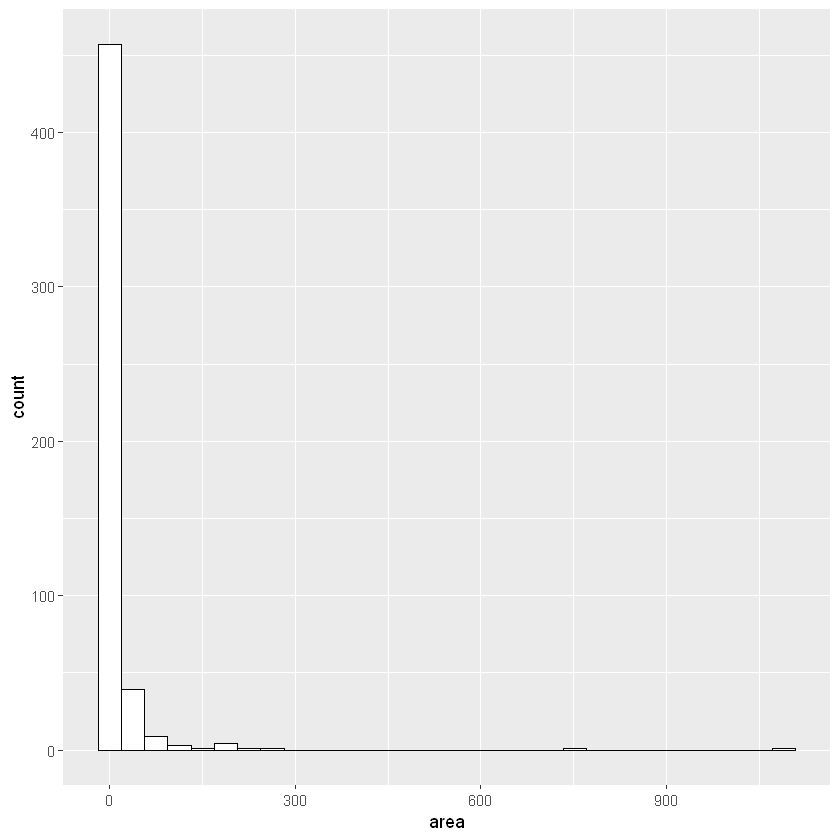

In [6]:
#Inspect area values
ggplot(fireData, aes(x=area)) + 
  geom_histogram(color="black", fill="white")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 247 rows containing non-finite values (stat_bin)."Warning message:
"Removed 247 rows containing non-finite values (stat_density)."

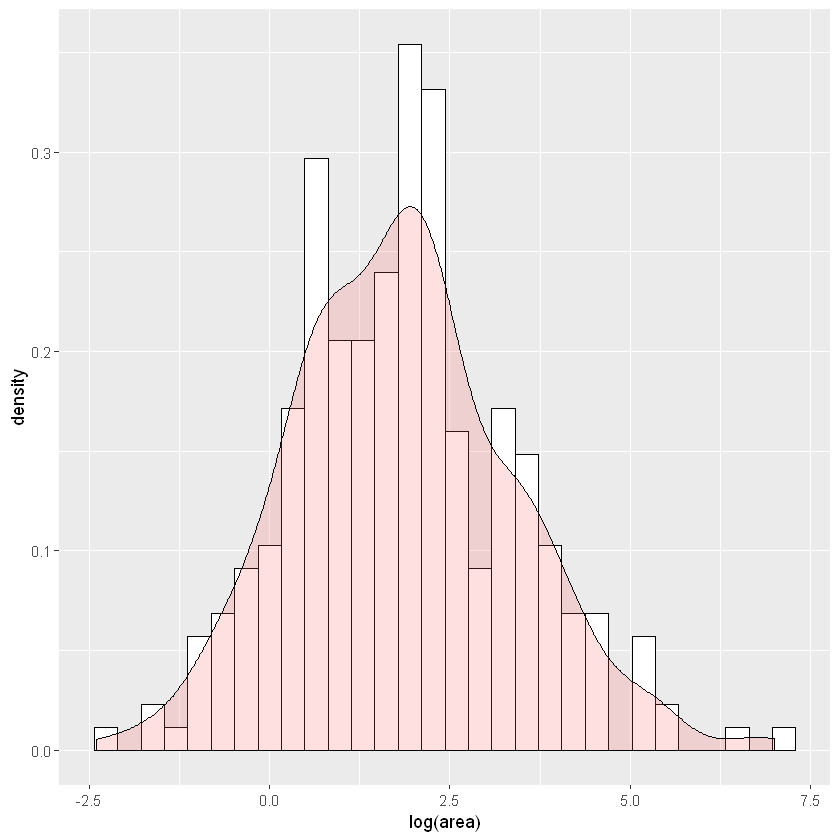

In [7]:
#Log transformation
ggplot(fireData, aes(x=log(area))) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666") 

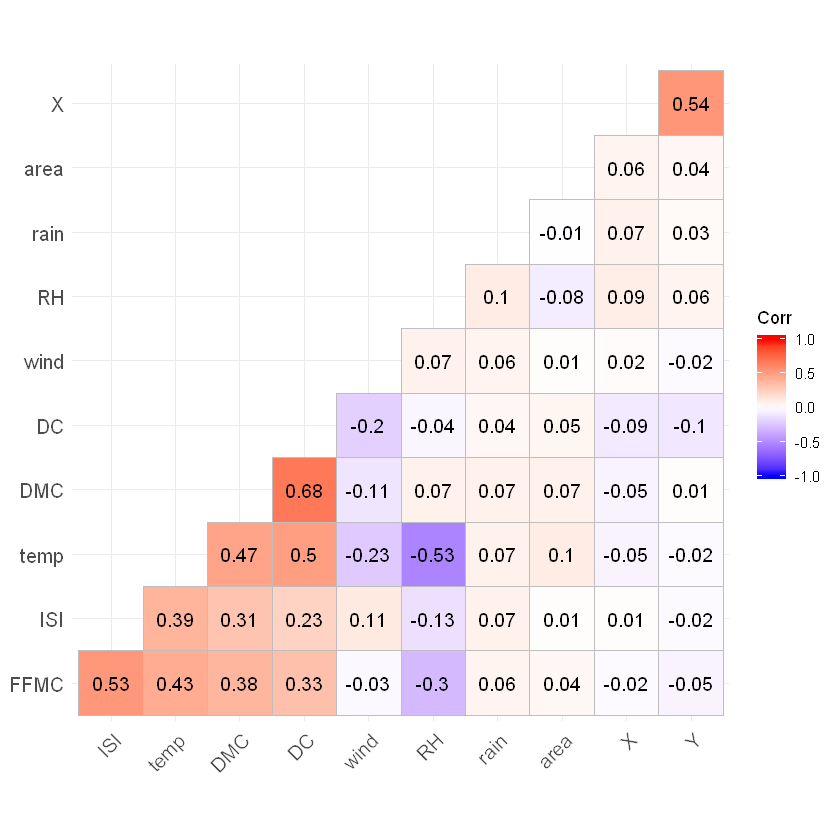

In [8]:
#Subset the numeric variables
fireDataNum <- names(fireData) %in% c("month", "day")

#Explore correlation between each variables
cormat <- round(cor(fireData[!fireDataNum]),2)
ggcorrplot(cormat, hc.order = TRUE, type = "lower",
   lab = TRUE)

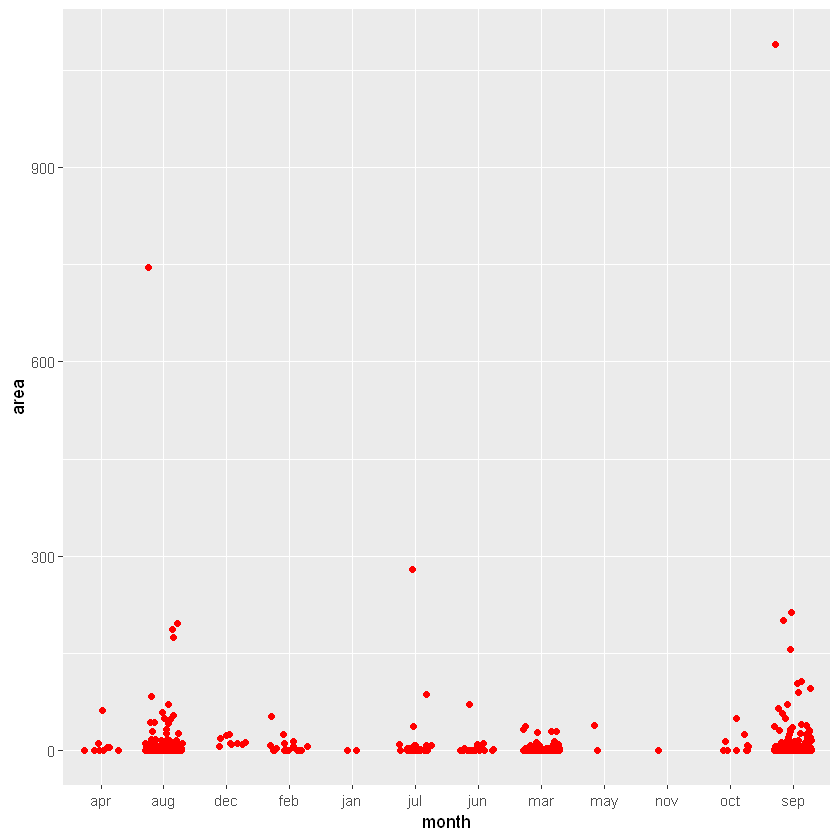

In [9]:
#Area by month
ggplot()+
  geom_jitter(aes(month, area), data = fireData, colour = I("red"), position = position_jitter(width = 0.3)) 

In [39]:
#Fire incident by month
fireData %>%
    group_by(month) %>%
    summarize(count = length(area), mean(area), maxar = max(area),
    median(area), sum(area)) %>%
    arrange(desc(maxar))

month,count,mean(area),maxar,median(area),sum(area)
sep,172,17.942616,1090.84,1.360,3086.13
aug,184,12.489076,746.28,0.545,2297.99
jul,32,14.369687,278.53,1.035,459.83
jun,17,5.841176,70.32,0.000,99.30
apr,9,8.891111,61.13,0.000,80.02
feb,20,6.275000,51.78,0.550,125.50
oct,15,6.638000,49.37,0.000,99.57
may,2,19.240000,38.48,19.240,38.48
mar,54,4.356667,36.85,0.000,235.26
dec,9,13.330000,24.77,10.730,119.97


In [37]:
# Assume damaging forest fires have areas larger than 50
bigFireData <- fireData %>%
    filter(area > 70) %>%
    arrange(month, desc(area))

bigFireData

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0,746.28
8,6,aug,sun,91.4,142.4,601.4,10.6,19.6,41,5.8,0,196.48
8,8,aug,wed,91.7,191.4,635.9,7.8,26.2,36,4.5,0,185.76
2,2,aug,sat,93.7,231.1,715.1,8.4,21.9,42,2.2,0,174.63
1,4,aug,wed,91.7,191.4,635.9,7.8,19.9,50,4.0,0,82.75
8,6,aug,sat,92.2,81.8,480.8,11.9,16.4,43,4.0,0,71.30
7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0,278.53
7,6,jul,tue,93.1,180.4,430.8,11.0,26.9,28,5.4,0,86.45
9,4,jun,sat,90.5,61.1,252.6,9.4,24.5,50,3.1,0,70.32
6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0,1090.84


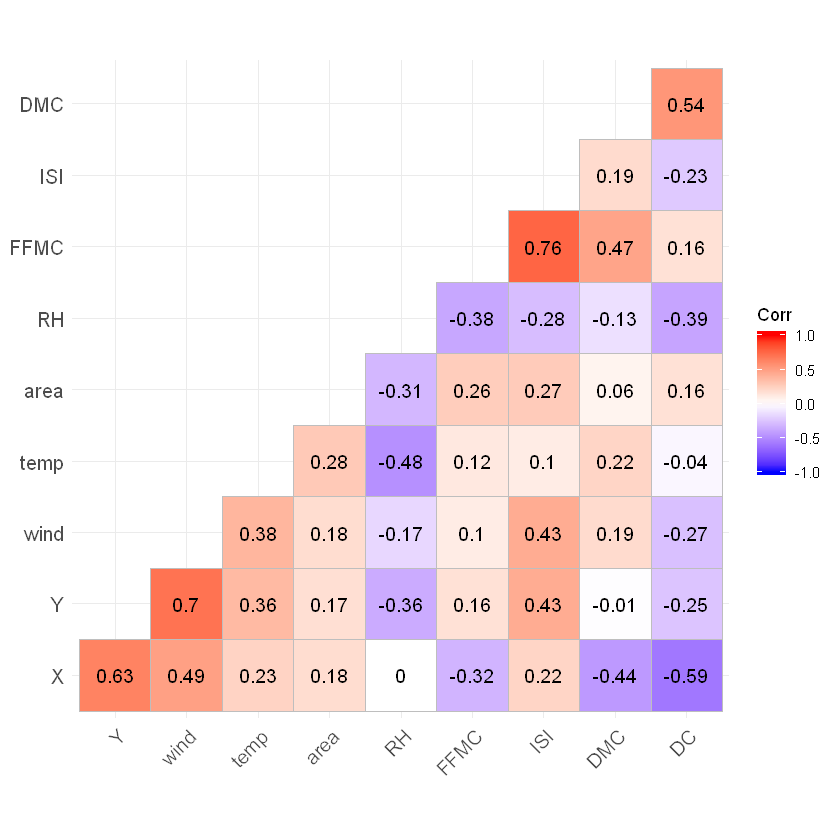

In [12]:
#Subset the numeric variables
#Exclude rain since all zero values
fireDataNum <- names(bigFireData) %in% c("month", "day", "rain")

#Explore correlation between each variables after filtering by month
cormat <- round(cor(bigFireData[!fireDataNum]),2)
ggcorrplot(cormat, hc.order = TRUE, type = "lower", lab = TRUE)

#Conclusion area does not have any strong correlation with other numeric variables

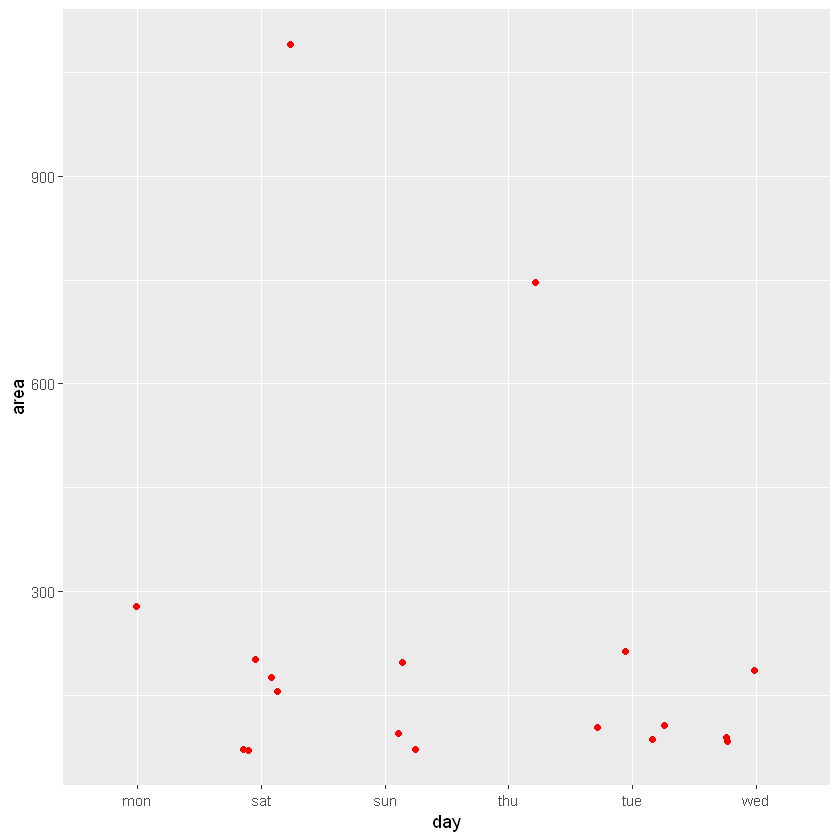

In [13]:
#Fire pattern by day
ggplot()+
  geom_jitter(aes(day, area), data = bigFireData, colour = I("red"), position = position_jitter(width = 0.3)) 

In [33]:
bigFireData %>%
    group_by(month, day) %>%
    summarize(count = length(area), mean(area), maxar = max(area),
    median(area), sum(area)) %>%
    arrange(month, desc(maxar))

month,day,count,mean(area),maxar,median(area),sum(area)
aug,thu,1,746.2800,746.28,746.280,746.28
aug,sun,1,196.4800,196.48,196.480,196.48
aug,wed,2,134.2550,185.76,134.255,268.51
aug,sat,2,122.9650,174.63,122.965,245.93
jul,mon,1,278.5300,278.53,278.530,278.53
jul,tue,1,86.4500,86.45,86.450,86.45
jun,sat,1,70.3200,70.32,70.320,70.32
sep,sat,3,482.2200,1090.84,200.940,1446.66
sep,tue,3,140.6433,212.88,105.660,421.93
sep,sun,2,82.9700,95.18,82.970,165.94


In [15]:
bigFireData %>%
    group_by(month) %>%
    summarize(count = length(wind), mean(wind), max(wind),
    median(wind), sum(wind))

month,count,mean(wind),max(wind),median(wind),sum(wind)
aug,6,4.233333,5.8,4.25,25.4
jul,2,5.150000,5.4,5.15,10.3
jun,1,3.100000,3.1,3.10,3.1
sep,9,3.166667,4.5,3.10,28.5


In [35]:
bigFireData %>%
    group_by(month, day) %>%    
    summarize(count = length(wind), mean(wind), maxwin = max(wind),
    median(wind), sum(wind)) %>%
    arrange(month, desc(maxwin))

month,day,count,mean(wind),maxwin,median(wind),sum(wind)
aug,sun,1,5.800000,5.8,5.80,5.8
aug,thu,1,4.900000,4.9,4.90,4.9
aug,wed,2,4.250000,4.5,4.25,8.5
aug,sat,2,3.100000,4.0,3.10,6.2
jul,tue,1,5.400000,5.4,5.40,5.4
jul,mon,1,4.900000,4.9,4.90,4.9
jun,sat,1,3.100000,3.1,3.10,3.1
sep,wed,1,4.500000,4.5,4.50,4.5
sep,sat,3,2.966667,4.0,3.10,8.9
sep,sun,2,3.550000,4.0,3.55,7.1


In [24]:
bigFireData %>%
    group_by(month) %>%    
    summarize(count = length(RH), mean(RH), max(RH),
    median(RH), sum(RH))

month,count,mean(RH),max(RH),median(RH),sum(RH)
aug,6,39.83333,50,41.5,239
jul,2,42.50000,57,42.5,85
jun,1,50.00000,50,50.0,50
sep,9,34.22222,46,36.0,308


In [36]:
bigFireData %>%
    group_by(month, day) %>%
    arrange(month) %>%
    summarize(count = length(RH), mean(RH), maxrh = max(RH),
    median(RH), sum(RH)) %>%
    arrange(month, desc(maxrh))

month,day,count,mean(RH),maxrh,median(RH),sum(RH)
aug,wed,2,43.00000,50,43.0,86
aug,sat,2,42.50000,43,42.5,85
aug,sun,1,41.00000,41,41.0,41
aug,thu,1,27.00000,27,27.0,27
jul,mon,1,57.00000,57,57.0,57
jul,tue,1,28.00000,28,28.0,28
jun,sat,1,50.00000,50,50.0,50
sep,sat,3,32.66667,46,27.0,98
sep,sun,2,35.00000,43,35.0,70
sep,tue,3,39.66667,43,40.0,119
